In [1]:
import datetime
from uniswappy import *
import matplotlib.pyplot as plt

In [2]:
# -------------------
# Canonical Settings
# -------------------

# Buy token selections
# - Chain0x.WETH
# - Chain0x.LINK
# - Chain0x.UNI
# - Chain0x.WBTC
# - Chain0x.BNB

# Sell token selections
# - Chain0x.USDC
# - Chain0x.USDT
# - Chain0x.DAI


chain = Chain0x(chain_nm = Chain0x.ETHEREUM, buy_tkn_nm = Chain0x.WETH, sell_tkn_nm = Chain0x.USDC, time_window = 1.5)
#chain = Chain0x(chain_nm = Chain0x.POLYGON, buy_tkn_nm = Chain0x.WETH, sell_tkn_nm = Chain0x.USDC, time_window = 1.5)
#chain = Chain0x(chain_nm = Chain0x.OPTIMISM, buy_tkn_nm = Chain0x.LINK, sell_tkn_nm = Chain0x.DAI, time_window = 1.5)
#chain = Chain0x(chain_nm = Chain0x.AVALANCHE, buy_tkn_nm = Chain0x.BNB, sell_tkn_nm = Chain0x.DAI, time_window = 0.5)
api = API0x(chain = chain.chain_nm)

# -------------------
# ETHDenverSim
# -------------------
sim = ETHDenverSimulator(buy_token = chain.get_buy_token(),
                         sell_token = chain.get_sell_token(),
                         time_window = chain.time_window,
                         trade_bias = chain.trade_bias,
                         td_model = chain.get_td_model(),
                         api = api)

sim.init_lp(init_x_tkn = chain.get_buy_init_amt(), 
            x_tkn_nm = chain.buy_tkn_nm, 
            init_x_invest = chain.init_investment)

# --------------------
# INFINITE PROCESS
# --------------------
# sim.process()  

# --------------------
# RETRIEVE STATE DATA
# --------------------
# swap_x_reserve = sim.get_x_reserve(ETHDenverSimulator.STATE_SWAP)
# swap_y_reserve = sim.get_y_reserve(ETHDenverSimulator.STATE_SWAP)

# arb_x_reserve = sim.get_x_reserve(ETHDenverSimulator.STATE_ARB)
# arb_y_reserve = sim.get_y_reserve(ETHDenverSimulator.STATE_ARB)

# swap_lp_price = sim.get_lp_price(ETHDenverSimulator.STATE_SWAP)
# arb_lp_price = sim.get_lp_price(ETHDenverSimulator.STATE_ARB)

# swap_amt = sim.get_swap_amt()

In [3]:
lp = sim.get_lp()
lp.summary()

Exchange WETH-USDC (LP)
Reserves: WETH = 10001.0, USDC = 34443706.34693543
Liquidity: 586916.906751916 



In [4]:
init_lp = LPTokenQuote().get_x(lp, 1)

In [6]:
IndexTokenQuote().get_x(lp, init_lp)

1.000000000000623

In [7]:
N_TRIALS = 30
x_amt_arr = []
y_amt_arr = []
y_redeem_arr = []
x_redeem_arr = []
lp_price_arr = []
tstamp_arr = []
swap_amt_arr = []
swap_tstamp_arr = []
trial_volume_arr = []

for k in range(N_TRIALS):
    sim.trial()
    y_redeem_arr.append(sim.get_y_redeem())
    x_redeem_arr.append(sim.get_x_redeem()) 
    tstamp_arr.append(sim.get_time_stamp(ETHDenverSimulator.STATE_SWAP))
    tstamp_arr.append(sim.get_time_stamp(ETHDenverSimulator.STATE_ARB))    
    x_amt_arr.append(sim.get_x_reserve(ETHDenverSimulator.STATE_SWAP))
    x_amt_arr.append(sim.get_x_reserve(ETHDenverSimulator.STATE_ARB))
    y_amt_arr.append(sim.get_y_reserve(ETHDenverSimulator.STATE_SWAP))
    y_amt_arr.append(sim.get_y_reserve(ETHDenverSimulator.STATE_ARB))   
    lp_price_arr.append(sim.get_lp_price(ETHDenverSimulator.STATE_SWAP))
    lp_price_arr.append(sim.get_lp_price(ETHDenverSimulator.STATE_ARB))
    swap_tstamp_arr.append(sim.get_time_stamp(ETHDenverSimulator.STATE_ARB))
    swap_amt_arr.append(sim.get_swap_amt())
    trial_volume_arr.append(sim.get_usd_trial_volume())
    if (k % 1 == 0): print(f"Trial {k}")   

Trial 0
Trial 1
Trial 2
Trial 3
Trial 4
Trial 5
Trial 6
Trial 7
Trial 8
Trial 9
Trial 10
Trial 11
Trial 12
Trial 13
Trial 14
Trial 15
Trial 16
Trial 17
Trial 18
Trial 19
Trial 20
Trial 21
Trial 22
Trial 23
Trial 24
Trial 25
Trial 26
Trial 27
Trial 28
Trial 29


In [8]:
lp = sim.get_lp()
lp.summary()

Exchange WETH-USDC (LP)
Reserves: WETH = 10005.316896268278, USDC = 34462019.70830958
Liquidity: 587163.1731981145 



In [10]:
IndexTokenQuote().get_x(lp, init_lp)

1.0000120584853236

Text(0, 0.5, 'WETH Swap Amounts')

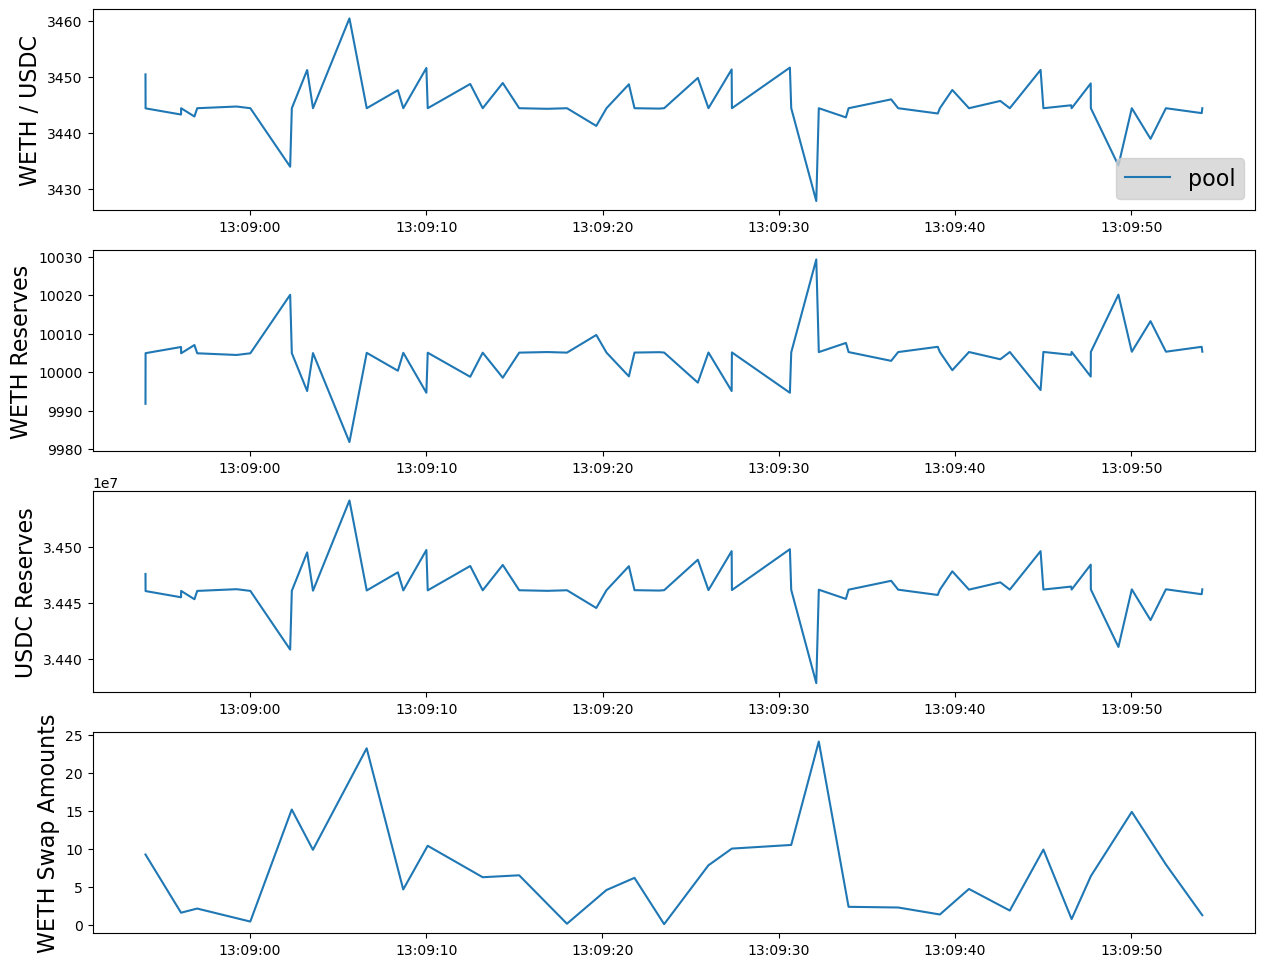

In [11]:
fig, (p_ax, tkn1_ax, tkn2_ax, s_ax) = plt.subplots(nrows=4, sharex=False, sharey=False, figsize=(15, 12))
p_ax.plot(tstamp_arr, lp_price_arr, label='pool')
p_ax.set_ylabel(f'{sim.get_x_tkn().token_name} / {sim.get_y_tkn().token_name}', fontsize=16)
p_ax.legend(fontsize=16, facecolor="lightgray", loc='lower right')

tkn1_ax.plot(tstamp_arr, x_amt_arr)
tkn1_ax.set_ylabel(f'{sim.get_x_tkn().token_name} Reserves', fontsize=16)

tkn2_ax.plot(tstamp_arr, y_amt_arr)
tkn2_ax.set_ylabel(f'{sim.get_y_tkn().token_name} Reserves', fontsize=16)

s_ax.plot(swap_tstamp_arr, swap_amt_arr)
s_ax.set_ylabel(f'{sim.get_x_tkn().token_name} Swap Amounts', fontsize=16)

Text(0, 0.5, 'Volume USDC ')

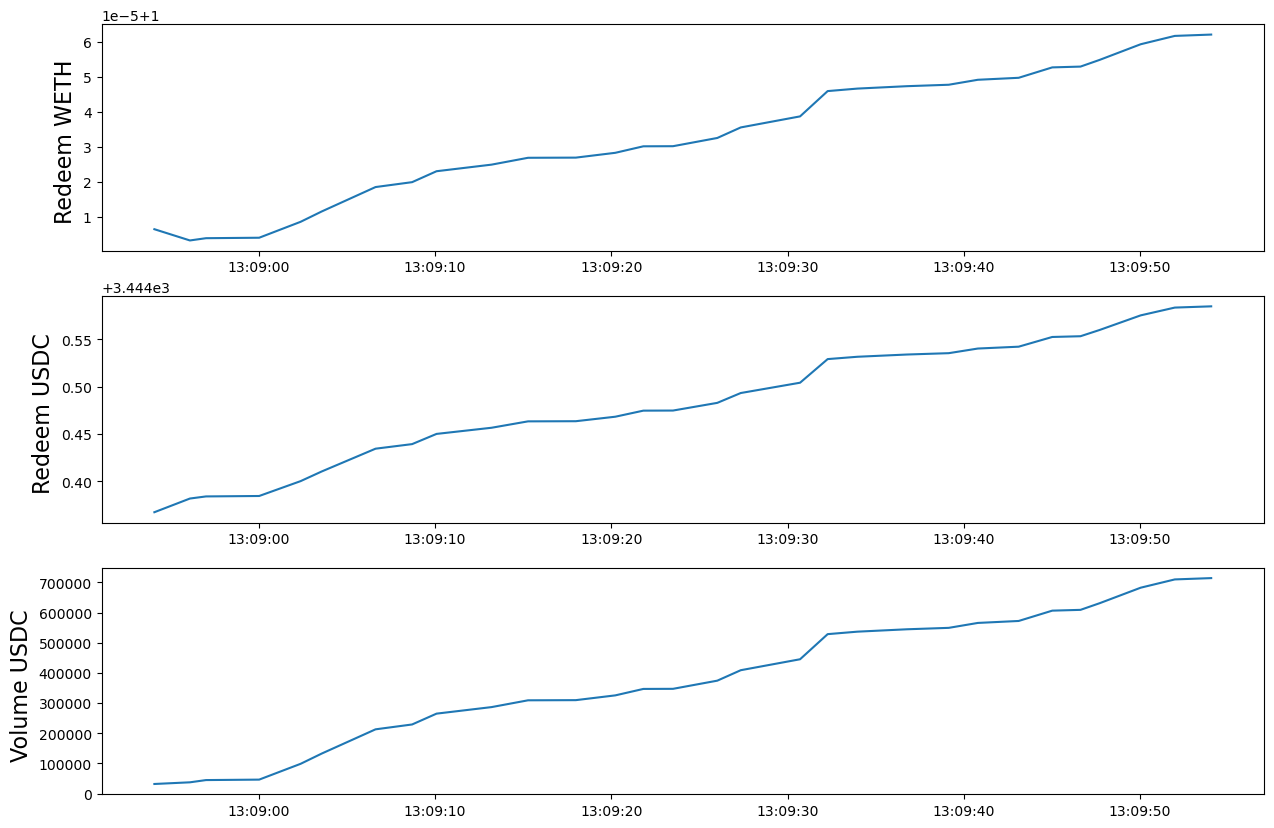

In [12]:
fig, (x_ax, y_ax, vol_ax) = plt.subplots(nrows=3, sharex=False, sharey=False, figsize=(15, 10))
x_ax.plot(swap_tstamp_arr, x_redeem_arr, label='x redeem')
x_ax.set_ylabel(f'Redeem {sim.get_x_tkn().token_name} ', fontsize=16)

y_ax.plot(swap_tstamp_arr, y_redeem_arr, label='y redeem')
y_ax.set_ylabel(f'Redeem {sim.get_y_tkn().token_name} ', fontsize=16)

vol_ax.plot(swap_tstamp_arr, np.cumsum(trial_volume_arr), label='y redeem')
vol_ax.set_ylabel(f'Volume {sim.get_y_tkn().token_name} ', fontsize=16)